# Scikit-Learn의 문서 전처리 기능

#BOW 인코딩

문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW(Bag of Words) 인코딩 방법입니다. BOW 인코딩 방법에서는 전체 문서 {d1, d2, ..., dn} 를 구성하는 고정된 단어장 (vocabulary) {t1, t2, ..., tm} 를 만들고 di 라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법입니다.

#Scikit-Learn 문서 전처리 기능

Scikit-Learn의 feature_extraction 서브패키지와 feature_extraction.text 서브패키지는 다음과 같이 같은 문서 전처리용 클래스를 제공합니다.

- DictVectorizer: 각 단어의 수를 세어놓은 사전에서 BOW 인코딩 벡터를 만든다.

- CountVectorizer : 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 만든다.

- TfidfVectorizer: CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 만든다.

- HashingVectorizer : 해시 함수 (hash function)을 사용하여 적은 메모리와 빠른 속도로 BOW 인코딩 벡터를 만든다.

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DictVectorizer

Dictvectorizer는 feature_extraction 서브패키지에서 제공합니다. 문서에서 단어의 사용 빈도를 나타내는 딕셔너리 정보를 입력받아 BOW 인코딩한 수치 벡터로 변환합니다.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

v = DictVectorizer(sparse = False)
D = [{'A':1, 'B':2}, {'B':3, 'C':1}]
X = v.fit_transform(D)

X

array([[1., 2., 0.],
       [0., 3., 1.]])

In [ ]:
v.feature_names_

['A', 'B', 'C']

In [ ]:
v.transform({'C':4, 'D':3})

array([[0., 0., 4.]])

# CountVectorizer

CountVectorizer는 다음과 같은 세가지 작업을 수행합니다.

1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
    'The last document?',
]

vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'document': 1,
 'first': 2,
 'is': 3,
 'last': 4,
 'one': 5,
 'second': 6,
 'the': 7,
 'third': 8,
 'this': 9}

In [ ]:
vect.transform(['This is the second document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]])

In [ ]:
vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vect.transform(corpus).toarray()

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]])

CountVectorizer는 이러한 작업을 하기 위한 다음과 같은 인수를 가질 수 있다.

1. stop_words : 문자열 {'english'}, 리스트 또는 None (default)
  - stop words 목록. 'english'이면 영어용 스탑 워드 사용.
3. analyzer : 문자열 {"word", "char", "char_wb"} 또는 함수
  - 단어 n-gram, 문자 n-gram, 단어 내의 문자 n-gram
4. token_pattern : string
  - 토큰 정의용 정규 표현식
5. ngram_range : (min_n, max_n) tuple
  - n-gram 범위
6. max_df : 정수 또는 [0.0, 1.0] 사이의 실수. (default = 1)
  - 단어장에 포함되기 위한 최대 빈도
7. min_df : 정수 또는 [0.0, 1.0] 사이의 실수. (default = 1)
  - 단어장에 포함되기 위한 최소 빈도

# Stop Words

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말합니다. 관사나 접속사, 한국어의 조사 등이 해당될 수 있습니다. stop_words 인수로 조절할 수 있습니다.

In [ ]:
vect = CountVectorizer(stop_words = ['and', 'is', 'the', 'this']).fit(corpus)
vect.vocabulary_

{'document': 0, 'first': 1, 'last': 2, 'one': 3, 'second': 4, 'third': 5}

In [ ]:
vect = CountVectorizer(stop_words = "english").fit(corpus)
vect.vocabulary_

{'document': 0, 'second': 1}

# 토큰

analyzer, tokenizer, token_pattern 등의 인수로 사용할 토큰 생성기를 선택할 수 있습니다.

In [ ]:
vect = CountVectorizer(analyzer = "char").fit(corpus)
vect.vocabulary_

{' ': 0,
 '.': 1,
 '?': 2,
 'a': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'h': 8,
 'i': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'u': 17}

In [ ]:
vect = CountVectorizer(token_pattern = "t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'third': 1, 'this': 2}

In [ ]:
import nltk

nltk.download('punkt')
vect = CountVectorizer(tokenizer = nltk.word_tokenize).fit(corpus)
vect.vocabulary_

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


{'.': 0,
 '?': 1,
 'and': 2,
 'document': 3,
 'first': 4,
 'is': 5,
 'last': 6,
 'one': 7,
 'second': 8,
 'the': 9,
 'third': 10,
 'this': 11}

# N-gram

N-gram은 단어장 생성에 사용할 토큰의 크기를 결정합니다. 모노그램(monogram)은 토큰 하나만 단아로 사용하며 바이그램(bigram)은 두 개의 연결된 토큰을 하나의 단어로 사용합니다.

In [ ]:
vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
vect.vocabulary_

{'and the': 0,
 'first document': 1,
 'is the': 2,
 'is this': 3,
 'last document': 4,
 'second document': 5,
 'second second': 6,
 'the first': 7,
 'the last': 8,
 'the second': 9,
 'the third': 10,
 'third one': 11,
 'this is': 12,
 'this the': 13}

In [ ]:
vect = CountVectorizer(ngram_range = (1, 2), token_pattern = "t\w+").fit(corpus)
vect.vocabulary_

{'the': 0, 'the third': 1, 'third': 2, 'this': 3, 'this the': 4}

# 빈도수

max_df, min_df 인수를 사용하여 문서에서 토큰이 나타난 횟수를 기준으로 단어장을 구성할 수 있습니다. 토큰의 빈도가 max_df로 지정한 값을 초과하거나 min_df로 지정한 값보다 작은 경우에는 무시됩니다. 인수 값은 정수인 경우 횟수, 부동소수점인 경우 비중을 뜻합니다.

In [ ]:
vect = CountVectorizer(max_df = 4, min_df = 2).fit(corpus)
vect.vocabulary_, vect.stop_words_

({'document': 0, 'first': 1, 'is': 2, 'this': 3},
 {'and', 'last', 'one', 'second', 'the', 'third'})

In [ ]:
vect.transform(corpus).toarray().sum(axis = 0)

array([4, 2, 3, 3])

# TF-IDF

TF-IDF (Term Frequency - Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법입니다.

구체적으로는 문서 d(document)와 단어 t 에 대해 다음과 같이 계산됩니다.
</br></br>
tf-idf(𝑑,𝑡)=tf(𝑑,𝑡)⋅idf(𝑡)

여기에서
</br></br>

- tf(d, t) : term frequency. 특정한 단어의 빈도수
- idf(t) : inverse document frequency. 특정한 단어가 들어 있는 문서의 수에 반비례하는 수
</br></br>
idf(d, t)=log (n / 1 + df(t))
</br></br>

- n : 전체 문서의 수
- df(t) : 단어 t를 가진 문서의 수

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

array([[0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.24151532, 0.        , 0.28709733, 0.        ,
        0.        , 0.85737594, 0.20427211, 0.        , 0.28709733],
       [0.55666851, 0.        , 0.        , 0.        , 0.        ,
        0.55666851, 0.        , 0.26525553, 0.55666851, 0.        ],
       [0.        , 0.38947624, 0.55775063, 0.4629834 , 0.        ,
        0.        , 0.        , 0.32941651, 0.        , 0.4629834 ],
       [0.        , 0.45333103, 0.        , 0.        , 0.80465933,
        0.        , 0.        , 0.38342448, 0.        , 0.        ]])

# Hashing Trick

CountVectorizer는 모든 작업을 메모리 상에서 수행하므로 처리할 문서의 크기가 커지면 속도가 느려지거나 실행이 불가능합니다. 이 때 HashingVectorizer를 사용한다면 해시 함수를 사용하여 단어에 대한 인덱스 번호를 생성하기 때문에 메모리 및 실행 시간을 줄일 수 있습니다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups()
len(twenty.data)

11314

In [ ]:
%time CountVectorizer().fit(twenty.data).transform(twenty.data)

CPU times: user 9.39 s, sys: 86.9 ms, total: 9.48 s
Wall time: 14.5 s


<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features = 300000)

In [ ]:
%time hv.transform(twenty.data)

CPU times: user 2.15 s, sys: 16 ms, total: 2.17 s
Wall time: 2.18 s


<11314x300000 sparse matrix of type '<class 'numpy.float64'>'
	with 1786336 stored elements in Compressed Sparse Row format>

# 예시

다음은 Scikit-Learn의 문자열 분석기를 사용하여 데이터에 특정한 단어가 어느 정도 사용되었는지 빈도수를 알아봅시다.

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.simplefilter("ignore")

from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [ ]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [ ]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809892.txt',
 '1809894.txt',
 '1809897.txt',
 '1809891.txt',
 '1809898.txt',
 '1809895.txt',
 '1809899.txt',
 '1809896.txt',
 '1809893.txt']

In [ ]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [ ]:
# 한글 패치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family = "NanumBarunGothic")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

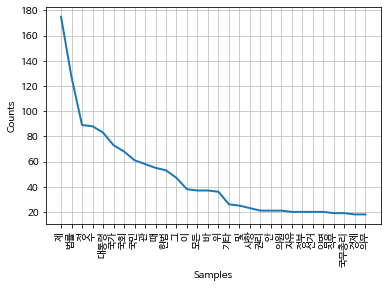

In [ ]:
from konlpy.tag import Okt
from nltk import Text

okt = Okt()

kolaw = Text(okt.nouns(c), name = "kolaw")
kolaw.plot(30)
plt.show()